# Feature Selection


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("data/Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [45]:
df.drop(["day", "month", 'year'],axis=1,inplace=True)

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [48]:
df['Classes'] = np.where(df["Classes"].str.contains("not fire"), 0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [50]:
## Defining independent and dependent features
X = df.drop(["FWI"], axis=1)
Y = df['FWI']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [52]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

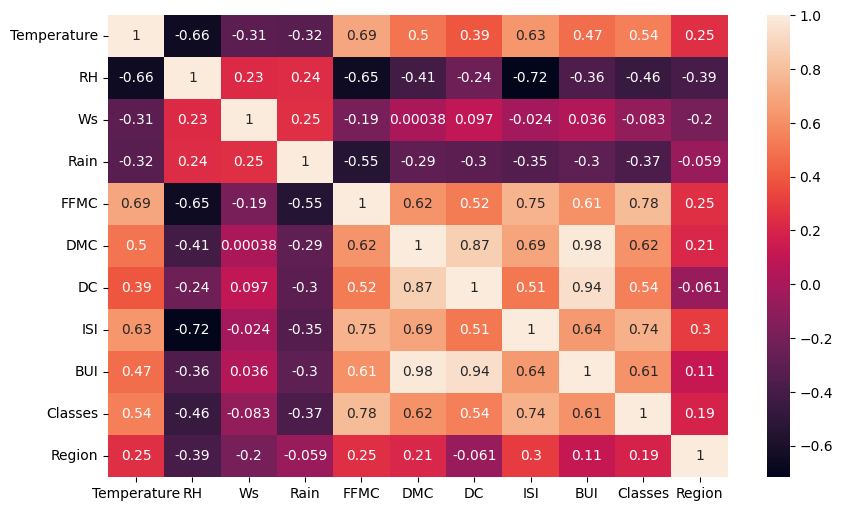

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), annot=True)

In [54]:
def correlation(dataset, threshold):
    corr_set = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_set.add(dataset.columns[i])
    return corr_set

In [55]:
corr_columns = correlation(X_train, 0.85)
corr_columns

{'BUI', 'DC'}

In [56]:
X_train.drop(corr_columns, axis = 1,inplace=True)
X_test.drop(corr_columns, axis = 1, inplace=True)

### Feature Scaling and standardization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [76]:
scaler = pickle.load(open("scaler.pkl", "rb"))

#####  Box plot to view the changes due to standardization

Text(0.5, 1.0, 'X_train after scaling')

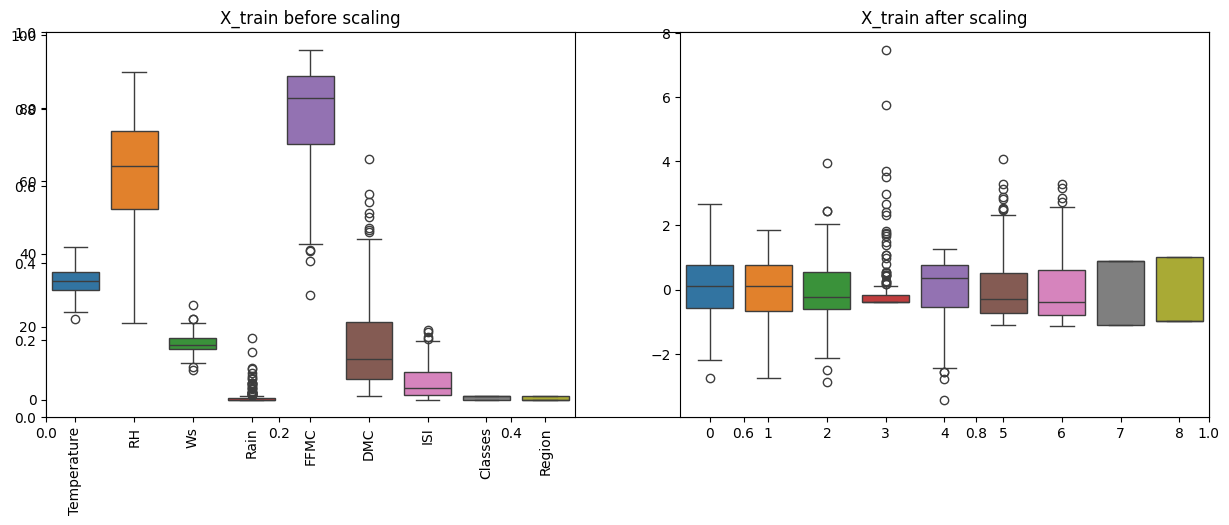

In [58]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.xticks(rotation=90)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train after scaling")

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled, Y_train)
pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  0.5468236465249978
r2:  0.9839977157632893


### Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
LassoLearn = Lasso()
LassoLearn.fit(X_train_scaled, Y_train)
pred = LassoLearn.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  1.133175994914409
r2:  0.926474232680569


### Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, Y_train)
pred = ridge_regression.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  0.5642305340105715
r2:  0.9834070933284211


### Elastic Net

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, Y_train)
pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(pred, Y_test)
r2 = r2_score(pred, Y_test)
print("mae: ", mae)
print("r2: ", r2)

mae:  1.8822353634896005
r2:  0.7814447243400926


### Hyperparameter tuning

In [63]:
182-36

146

In [64]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, Y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [65]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [66]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [67]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mae:  0.619970115826343
r2:  0.980851982434192


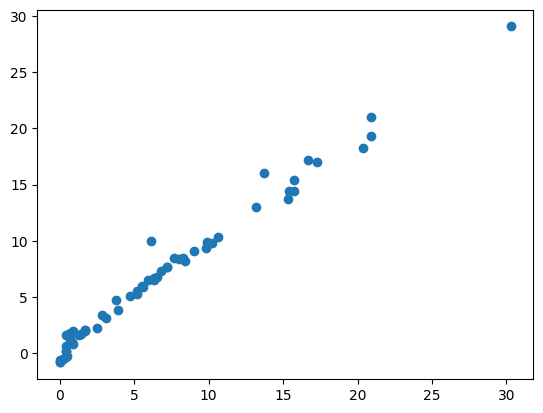

In [68]:
pred_lasso = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(pred_lasso, Y_test)
r2 = r2_score(pred_lasso, Y_test)
print("mae: ", mae)
print("r2: ", r2)
plt.scatter(Y_test,pred_lasso)

mae:  0.5642305340105715
r2:  0.9834070933284211


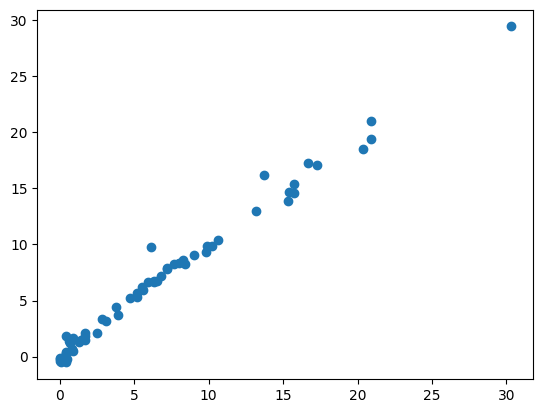

In [69]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv = 5)
ridge_cv.fit(X_train_scaled, Y_train)

pred_ridge= ridge_cv.predict(X_test_scaled)
mae = mean_absolute_error(pred_ridge, Y_test)
r2 = r2_score(pred_ridge, Y_test)
print("mae: ", mae)
print("r2: ", r2)
plt.scatter(Y_test,pred_ridge)

mae:  0.6575946731430898
r2:  0.9799084998743879


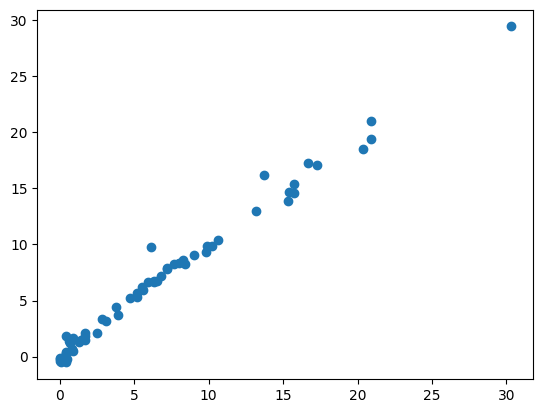

In [70]:
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(cv = 5)
elastic_cv.fit(X_train_scaled, Y_train)

pred_elastic= elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(pred_elastic, Y_test)
r2 = r2_score(pred_elastic, Y_test)
print("mae: ", mae)
print("r2: ", r2)
plt.scatter(Y_test,pred_ridge)

### Pickling the model

In [71]:
import pickle
pickle.dump(ridge_cv, open("regressor.pkl", "wb"))

In [72]:
model = pickle.load(open("regressor.pkl", 'rb'))

In [73]:
model.predict(X_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


array([-44.67107822, -38.00383071,  87.75526876, -14.10185948,
       -29.23314647,  13.54041706, -10.60226469,  28.12558281,
       -37.69260892,  -4.94063625,  31.89640831,  55.62604303,
        45.59747856, -34.76849549, -27.65247057, -43.22749875,
       -35.47444806,  49.18353843, -38.89274819,  18.90873998,
        -9.45977378,  -8.98740868,  37.78115144, 201.36464658,
       -30.78404568, -39.65979165, -22.56333734,  -7.49341279,
        12.38595136, -24.31924925, -44.12573575, -39.61630859,
       -19.98856251,   1.90757156, -48.28412872, -37.1979369 ,
        70.49278984, -12.09651116, -31.54390951,  53.97996257,
        40.24746656,  45.42993413, -25.92712684,  49.52345354,
        53.46810344, -15.85898207, -40.40026788, 133.00425678,
       -37.79988785, -36.72283191,  31.16050583, -22.46052727,
       -42.13867299,  79.66253673,  -2.48288222, 127.99492023,
        35.99661724, 125.44518871, 173.29286948,  73.64301419,
       -43.61651399, -20.32389814, -18.03026228, -37.44

In [77]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')